In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np


# Simple Linear Regression

In [2]:
df=pd.read_csv('/Users/pranav/Desktop/Coding/Data-Science/DATA/height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


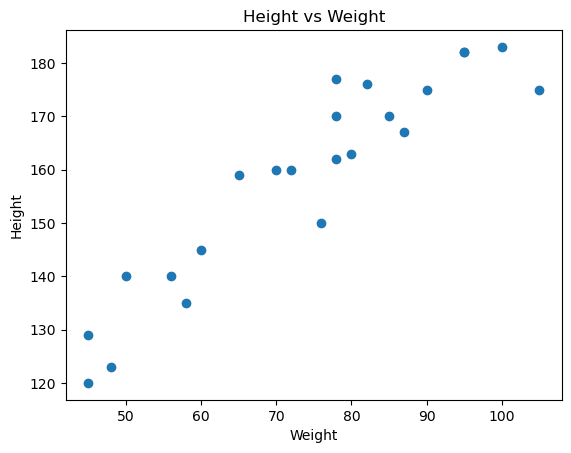

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [3]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')
plt.show()

df.corr()

# Standardization

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X=df[['Weight']]
y=df['Height']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_pred,y_test))

rmse

10.477400726827076

# Polynomial Regression

In [5]:
from sklearn.preprocessing import PolynomialFeatures

df=pd.read_csv('/Users/pranav/Desktop/Coding/Data-Science/DATA/Advertising.csv')
X=df.drop(columns=['sales'])
y=df['sales']

for i in range(1,4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    polyconverter=PolynomialFeatures(degree=i,include_bias=True)
    X_train=polyconverter.fit_transform(X_train)
    X_test=polyconverter.transform(X_test)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_pred,y_test))
    print(f'RMSE for degree {i}: {rmse}')


RMSE for degree 1: 1.7815996615334504
RMSE for degree 2: 0.6425809120553612
RMSE for degree 3: 0.5427415675039091
